# Notebook 6  - Machine Learning Models for Time Series Forecasting

`Yesterday is gone. Tomorrow has not yet come. We have only today. Let us begin.
-Mother Theresa`

---

## Notebook Outline

- Machine Learning Models for Time Series Forecasting

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from pandas.plotting import register_matplotlib_converters
from IPython.display import display
from tsa_functions import *
from iragca.matplotlib import Styles

register_matplotlib_converters()
plt.style.use(Styles.ML.value)
# np.set_printoptions(precision=2)
# pd.set_option('precision', 2)

---

## Machine Learning Models for Time Series Forecasting

In this notebook, we will build a methodology for using machine learning models for time series forecasting.

---

#### Example: Global Surface Summary of the Day - Manila

Data is taken from the National Centers for Environmental Information (NCEI), which is part of the National Oceanic and Atmospheric Administration (NOAA) under the U.S. Department of Commerce. Specifically, we will be using the Global Surface Summary of Day Data (GSOD) for Station 984250 - Manila covering the years from 1990 to 2020 (31 years).

| Features | Description |
| --- | --- |
| YEARMODA | Date |
| TEMP | Mean temperature for the day in Fahrenheit |
| MAX | Max temperature for the day in Fahrenheit |
| MIN | Min temperature for the day in Fahrenheit |
| WDPD | Mean wind speed for the day in knots |
| MXSPD | Max sustained wind speed for the day in knots |
| PRCP | Total precipitation reported during the day in inches |


<b>IMPORTANT NOTES</b>:

- Missing values have already been recoded and imputed (linearly, so they are bad)
- Leap days have been removed

In [2]:
df = pd.read_csv('special_datasets/gsod_manila_1990_2020.csv')
df.index = pd.to_datetime(df.YEARMODA)
del df['YEARMODA']
df

,TEMP,MAX,MIN,WDSP,MXSPD,PRCP
YEARMODA,,,,,,
1990-01-01,79.0,84.6,74.7,2.9,5.8,0.00
1990-01-02,81.1,85.8,73.4,2.9,7.8,0.00
1990-01-03,80.4,85.1,75.6,4.9,11.7,0.00
1990-01-04,78.2,84.2,74.3,3.3,9.7,0.00
1990-01-05,79.7,86.4,73.0,3.9,9.7,0.00
...,...,...,...,...,...,...
2020-12-27,75.9,77.4,75.0,3.6,7.8,1.14
2020-12-28,82.7,87.8,73.4,3.6,7.8,0.00
2020-12-29,83.0,91.6,78.6,4.4,7.8,0.16


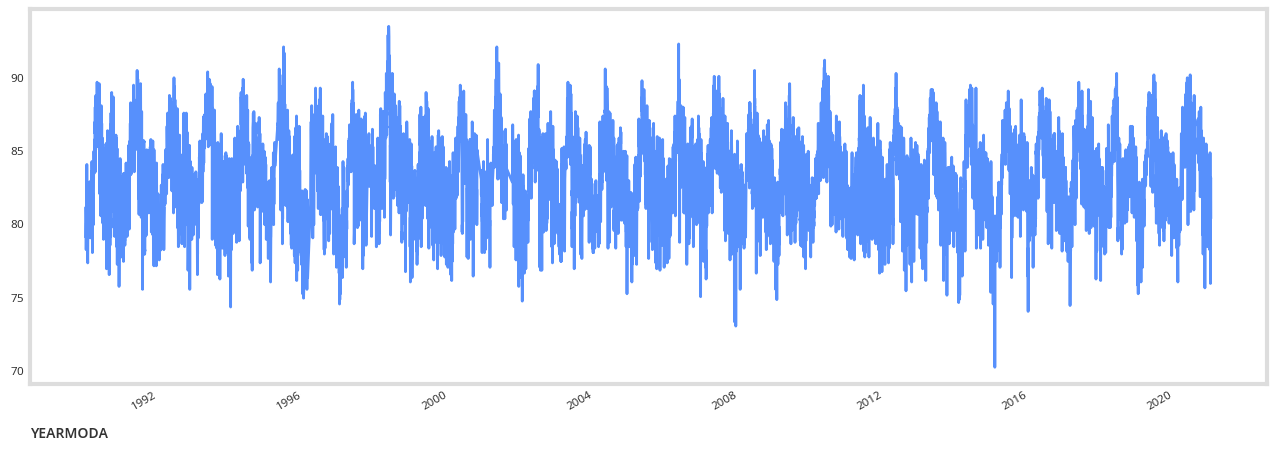

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


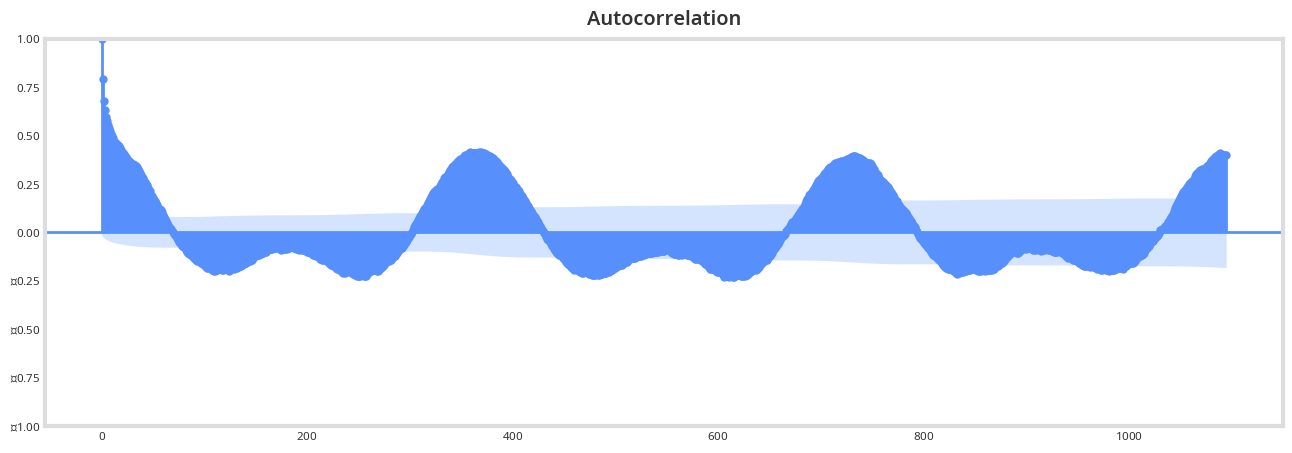

In [3]:
df.TEMP.plot(figsize=(15,5))
plt.show()

fig, ax = plt.subplots(figsize=(15,5))
sm.graphics.tsa.plot_acf(df.TEMP, lags=365*3, ax=ax)
plt.show()

### Time Series Forecasting as a Regression Problem

In a previous notebook, we briefly discussed how one can use classic regression models on time series data.

To do this, we first need to transform the data into a supervised learning dataset.

In other words, we need to create a new dataset consisting of $X$ and $Y$ variables, where $X$ refers to the features and $Y$ refers to the targets.

### Autoregression

<b><i>Autoregression</b></i> is the idea of using lagged values of a random variable as predictors for future observations. 

For example, the classic autoregressive (AR) model is formulated as:

\begin{align*}
    X_{t} &= \beta_0 + \sum_{i=1}^{p} \beta_{i} X_{t-i} + \varepsilon_t
\end{align*}

More generally, the data generating process can be written as:

\begin{align*}
    X_{t} &= f\left(X_{t-1}, X_{t-2}, \ldots\right)
\end{align*}

where $f$ may be some linear or non-linear function. 

In this notebok, we will be using machine learning models to estimate $f$.

### Lookback Window

To create the new $(X,Y)$ dataset, we first need to decide what the $X$ features are. 

For the moment, let's ignore any exogenous variables. In this case, what determines the $X$s is how far we <i>lookback</i>. For example, this corresponds to the $(p,d,q)$ parameters in the classic ARIMA formulaton.

In general, we can treat the lookback as a hyperparameter, which we will call the <i>window size</i>. Note that hyperparameters can either be optimized for or heuristically selected.

<i>Advanced note:</i> Technically, we could build an entire methodology for feature engineering $X$s.

### One-Step Forecasting

Let's build a model for making one-step forecasts.

In this example, we'll use observations from 2019. For testing, we will hold out the month of December (that's 31 data points).

Thus, to test our model, we will be generating <u>31 one-step forecasts</u>!

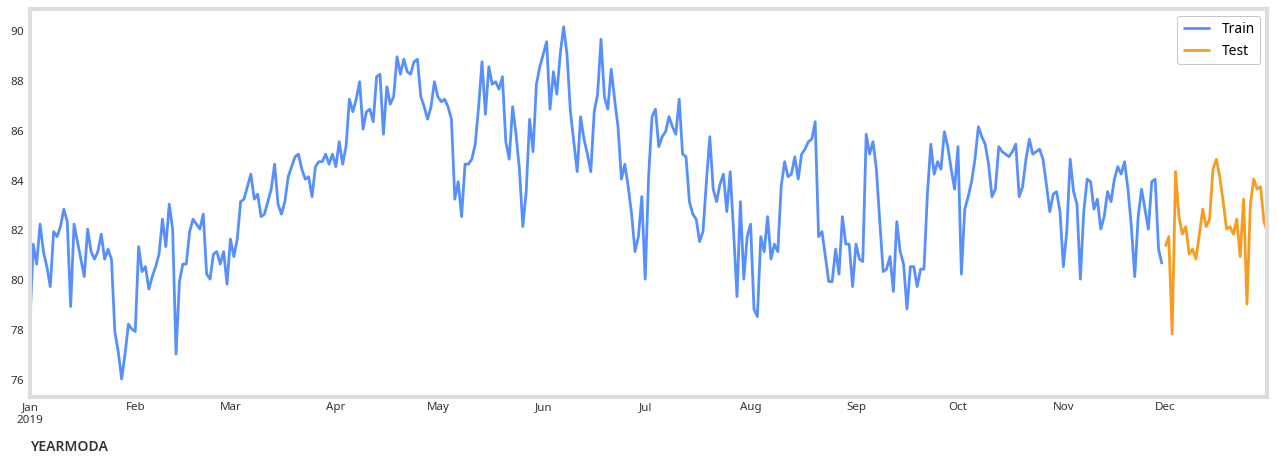

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


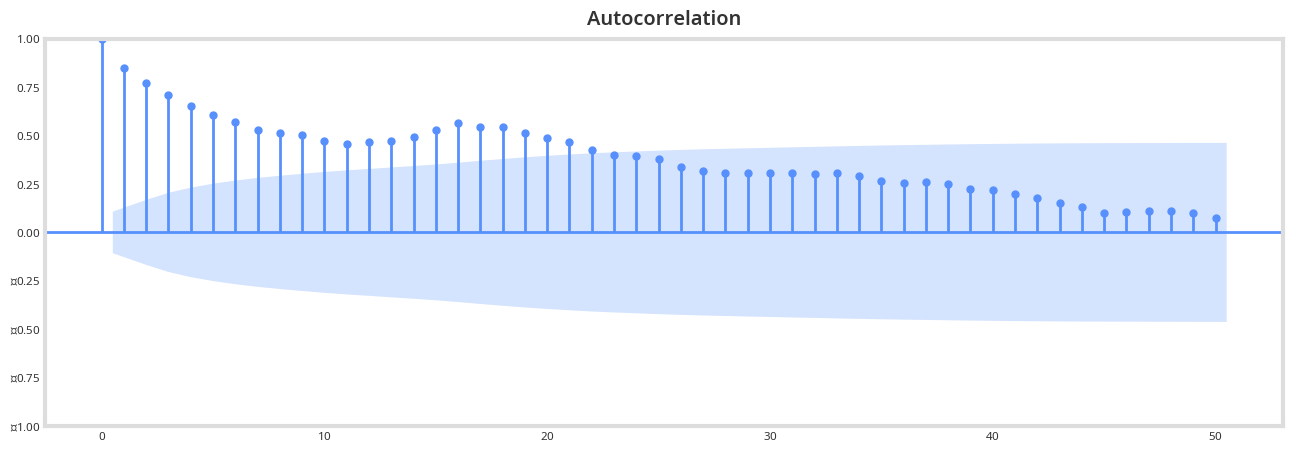

,TEMP,MAX,MIN,WDSP,MXSPD,PRCP
YEARMODA,,,,,,
2019-01-01,78.2,85.1,72.7,3.1,5.8,0.83
2019-01-02,81.4,88.7,73.4,3.4,5.8,0.09
2019-01-03,80.6,84.2,75.7,3.9,7.8,0.00
2019-01-04,82.2,89.2,75.9,5.3,7.8,0.00
2019-01-05,81.1,90.0,74.5,5.6,9.7,0.00
...,...,...,...,...,...,...
2019-12-27,84.0,92.3,77.9,3.9,5.8,0.00
2019-12-28,83.6,90.5,78.3,4.1,11.7,0.00
2019-12-29,83.7,89.2,77.9,4.7,11.7,0.00


In [4]:
n = 365
test_size = 31

df_sample = df.iloc[-n*2:-n, :]
ts_train = df_sample.TEMP[:-test_size]
ts_test = df_sample.TEMP[-test_size:]

ax = ts_train.plot(figsize=(15,5), label='Train')
ts_test.plot(ax=ax, label='Test')
ax.legend()
plt.show()

fig, ax = plt.subplots(figsize=(15,5))
sm.graphics.tsa.plot_acf(ts_train, lags=50, ax=ax)
plt.show()

display(df_sample)

In [5]:
def train_test_split(df_data, w, h, test_size, features):

    ### Train-Test split from DataFrame ###
    
    ### Exogenous Variables ###
    feat_len = len(features)
    df_series = df_data[features]
    
    split_time = df_series.shape[0] - test_size
    
    df_train = df_series.iloc[:split_time, :]
    df_test = df_series.iloc[split_time - w:, :]

    return df_train, df_test

def create_xy(series, label, w, h, shuffle=False):
    
    ### Create (X,Y) from DataFrame ####
    
    x = []
    y = []
    for i in range(series.shape[0]):
        if series.iloc[(i + w):(i + w + h), :].shape[0] < h:
            break
        x.append(series.iloc[i:(i + w), :])
        y.append(series.iloc[(i + w):(i + w + h), :][label])
    x = np.dstack(x)
    y = np.dstack(y)
    
    # Reshape x to (samples, features, lookback)
    x = np.swapaxes(x, 0, 2)
    
    # Reshape x to (samples, horizon)
    y = np.swapaxes(y, 0, 2)
    y = y[:, :, 0]
    
    return x,y

In [32]:
### HYPERPARAMETERS ###
w = 7 # lookback window
h = 1 # horizon
test_size = 31
target = ['TEMP']
# features = ['TEMP']
features = ['TEMP', 'MAX', 'MIN', 'WDSP', 'MXSPD', 'PRCP']

df_train, df_test = train_test_split(df_sample, w, h, test_size, features)

print('Train Series Shape:', df_train.shape)
print(' Test Series Shape:', df_test.shape)

### X,Y TRAIN SUPERVISED CREATION ###
train_x, train_y = create_xy(df_train, target[0], w, h, shuffle=False)

### X,Y TEST SUPERVISED CREATION ###
test_x, test_y = create_xy(df_test, target[0], w, h, shuffle=False)

print('     Train X Shape:', train_x.shape)
print('     Train Y Shape:', train_y.shape)

print('      Test X Shape:', test_x.shape)
print('      Test Y Shape:', test_y.shape)

Train Series Shape: (334, 6)
 Test Series Shape: (38, 6)
     Train X Shape: (327, 6, 7)
     Train Y Shape: (327, 1)
      Test X Shape: (31, 6, 7)
      Test Y Shape: (31, 1)


In [33]:
train_x[0]

array([[78.2 , 81.4 , 80.6 , 82.2 , 81.1 , 80.5 , 79.7 ],
       [85.1 , 88.7 , 84.2 , 89.2 , 90.  , 86.4 , 86.4 ],
       [72.7 , 73.4 , 75.7 , 75.9 , 74.5 , 75.2 , 74.3 ],
       [ 3.1 ,  3.4 ,  3.9 ,  5.3 ,  5.6 ,  5.8 ,  3.4 ],
       [ 5.8 ,  5.8 ,  7.8 ,  7.8 ,  9.7 ,  9.7 ,  7.8 ],
       [ 0.83,  0.09,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ]])

In [34]:
### Flatten Features ###
train_x = train_x.reshape((train_x.shape[0], train_x.shape[1]*train_x.shape[2]))
test_x = test_x.reshape((test_x.shape[0], test_x.shape[1]*test_x.shape[2]))

print('     Train X Shape:', train_x.shape)
print('     Train Y Shape:', train_y.shape)

print('      Test X Shape:', test_x.shape)
print('      Test Y Shape:', test_y.shape)

     Train X Shape: (327, 42)
     Train Y Shape: (327, 1)
      Test X Shape: (31, 42)
      Test Y Shape: (31, 1)


### LightGBM

The first ML model we'll look at is [`LightGBM`](https://lightgbm.readthedocs.io/en/latest/), a gradient boosting framework that uses tree-based learning algorithms designed for "speed and efficiency".

In [36]:
import lightgbm as lgb

model = lgb.LGBMRegressor()

model.fit(train_x.reshape(-1, 6*7), train_y.ravel()) # We have to flatten train_y

forecast_lgbm = model.predict(test_x.reshape(-1, 6*7))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000278 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1841
[LightGBM] [Info] Number of data points in the train set: 327, number of used features: 42
[LightGBM] [Info] Start training from score 83.712538
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

/home/iragca/Documents/github/DS412-Time-Series-Analysis-and-Stochastic-Processes/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


     Naive MAE: 1.3065 Celsius
  LightGBM MAE: 1.2464 Celsius


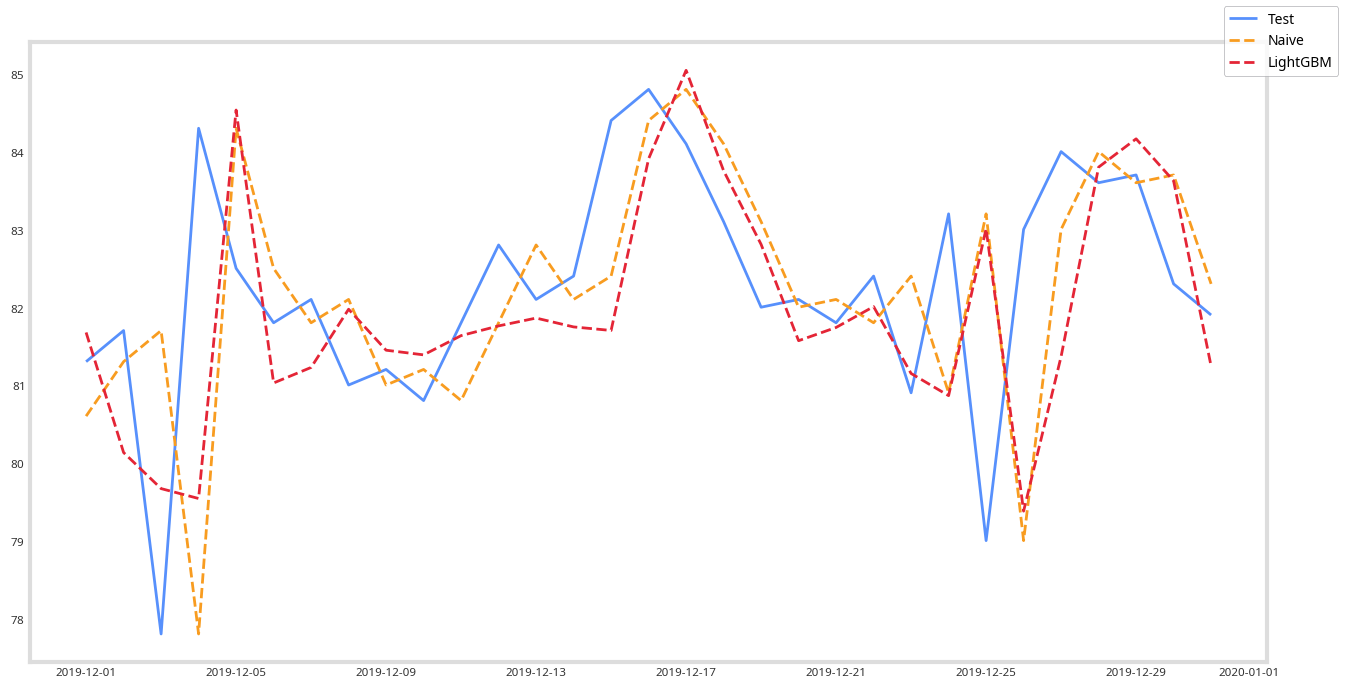

In [37]:
# Instead of iteratively using the naivef() function, i'll use array slicing to create the forecasts
forecast_naive = df_sample.TEMP[-test_size-1:-1].to_numpy()

print('     Naive MAE: %.4f Celsius' % mae(ts_test, forecast_naive))
print('  LightGBM MAE: %.4f Celsius' % mae(ts_test, forecast_lgbm))

ax = plt.figure(figsize = (15,8))
plt.plot(ts_test, label='Test')
plt.plot(ts_test.index, forecast_naive, linestyle = '--', label='Naive')
plt.plot(ts_test.index, forecast_lgbm, linestyle = '--', label='LightGBM')
ax.legend()
plt.show()

Let's check the residuals of our LightGBM model.

In [17]:
fitted = model.predict(train_x)

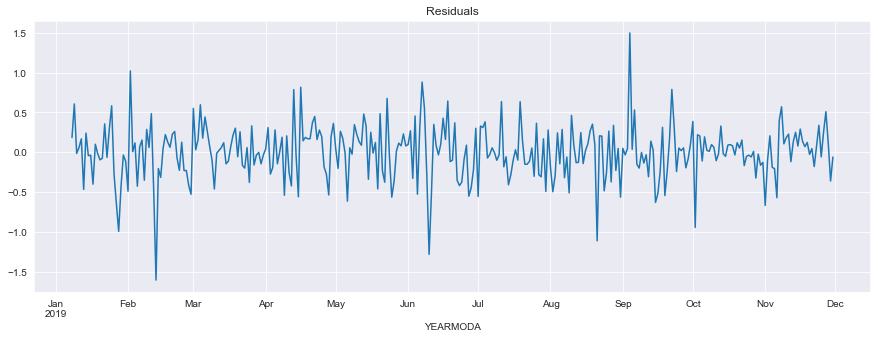

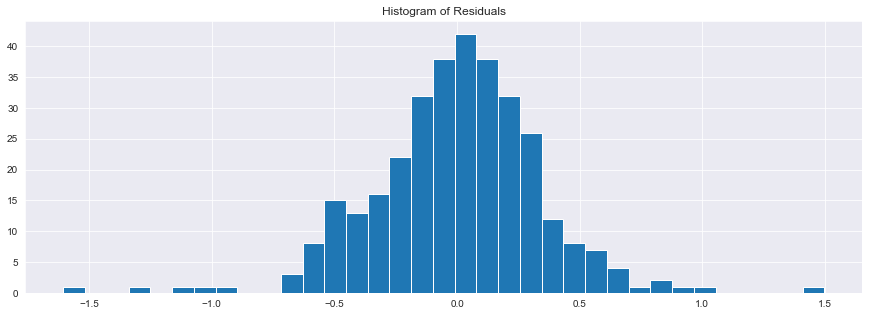

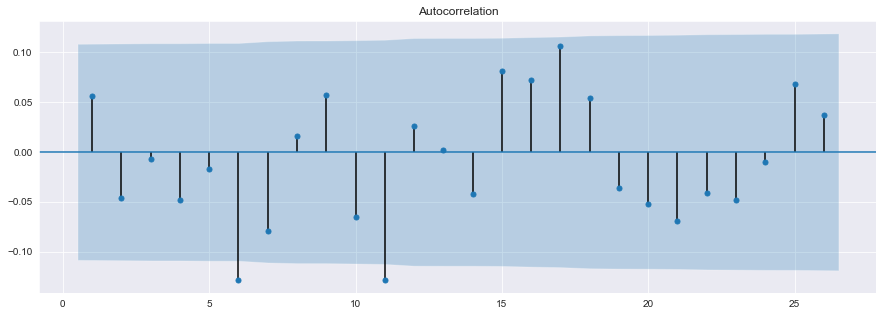

In [18]:
residuals = ts_train[w:] - fitted

ax = residuals.plot(figsize=(15,5))
ax.set_title('Residuals')
ax.autoscale()
plt.show()

ax = residuals.hist(figsize=(15,5), bins=35)
ax.set_title('Histogram of Residuals')
plt.show()

fig, ax = plt.subplots(figsize=(15,5))
sm.graphics.tsa.plot_acf(residuals, zero=False, ax=ax)
plt.show()

### K-Fold Cross-Validation for Autoregression

[Bergmeir, Hyndman and Koo (2015).](https://robjhyndman.com/publications/cv-time-series/) showed that you can actually use k-fold cross-validation for purely autoregressive models as long as the models considered have uncorrelated errors.

Let's optimize our lookback window by using k-fold CV and minimizing `MAE`.

In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

windows = range(1, 22)

results = []
names = []
for w in windows:
    
    h = 1
    test_size = 31
    target = ['TEMP']
    features = ['TEMP']

    df_train, df_test = train_test_split(df_sample, w, h, test_size, features)

    ### X,Y TRAIN SUPERVISED CREATION ###
    train_x, train_y = create_xy(df_train, target[0], w, h, shuffle=False)

    ### Flatten Features ###
    train_x = train_x.reshape((train_x.shape[0], train_x.shape[1]*train_x.shape[2]))
    
    cv = RepeatedKFold(n_splits = 10, n_repeats = 3, random_state = 1)
    scores = cross_val_score(lgb.LGBMRegressor(), train_x, train_y.ravel(), scoring = 'neg_mean_absolute_error', cv = cv, n_jobs = -1)
    results.append(scores)
    names.append(w)
    print('%4d --- MAE: %.4f (%.4f)' % (w, np.mean(scores), np.std(scores)))

   1 --- MAE: -1.1349 (0.1265)
   2 --- MAE: -1.1911 (0.1426)
   3 --- MAE: -1.2082 (0.1756)
   4 --- MAE: -1.2030 (0.1514)
   5 --- MAE: -1.2423 (0.1776)
   6 --- MAE: -1.2428 (0.1566)
   7 --- MAE: -1.2547 (0.1601)
   8 --- MAE: -1.2536 (0.1513)
   9 --- MAE: -1.2338 (0.1457)
  10 --- MAE: -1.2358 (0.1571)
  11 --- MAE: -1.2475 (0.1587)
  12 --- MAE: -1.2633 (0.1360)
  13 --- MAE: -1.2596 (0.1741)
  14 --- MAE: -1.2741 (0.1648)
  15 --- MAE: -1.2629 (0.1564)
  16 --- MAE: -1.2760 (0.1609)
  17 --- MAE: -1.2069 (0.1405)
  18 --- MAE: -1.1904 (0.1291)
  19 --- MAE: -1.1872 (0.1395)
  20 --- MAE: -1.1970 (0.1587)
  21 --- MAE: -1.1828 (0.1219)


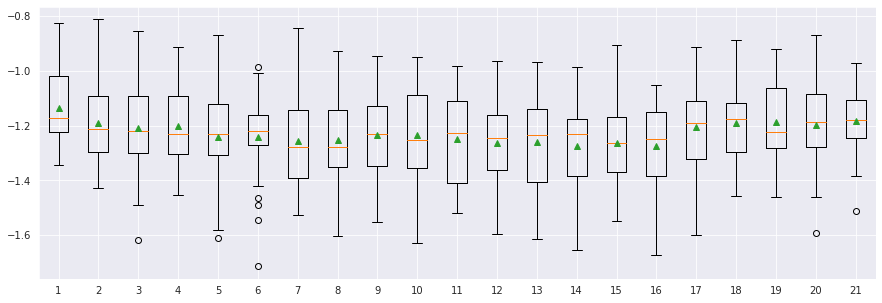

In [13]:
fig, ax = plt.subplots(figsize=(15,5))  
plt.boxplot(results, labels = names, showmeans = True)
plt.show()

### Multi-Step Forecasting

Suppose we were interested in forecasting the next $n$-days instead of just the next day.

There are several strategies we can use to do this:

1. Recursive Forecasting


2. Direct Forecasting


3. Single-Shot Forecasting


Check [Bontempi et al. (2012)](https://link.springer.com/chapter/10.1007/978-3-642-36318-4_3) for more complex combos.

#### Recursive Forecasting

In recursive forecasting, we first train a one-step model then generate a multi-step forecast by recursively feeding our predictions back into the model.

In [25]:
w = 1
h = 1
test_size = 31
target = ['TEMP']
features = ['TEMP']

df_train, df_test = train_test_split(df_sample, w, h, test_size, features)

train_x, train_y = create_xy(df_train, target[0], w, h, shuffle=False)
test_x, test_y = create_xy(df_test, target[0], w, h, shuffle=False)

train_x = train_x.reshape((train_x.shape[0], train_x.shape[1]*train_x.shape[2]))
test_x = test_x.reshape((test_x.shape[0], test_x.shape[1]*test_x.shape[2]))
test_y = test_y.ravel()    # We have to flatten test_y
train_y = train_y.ravel()  # We have to flatten train_y

model = lgb.LGBMRegressor().fit(train_x, train_y) 

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000030 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 76
[LightGBM] [Info] Number of data points in the train set: 333, number of used features: 1
[LightGBM] [Info] Start training from score 83.662162
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

In [26]:
forecast_recursive = []
x = test_x[:1, :].copy() # Must copy to avoid memory warnings

for i in range(test_size):
    y_hat = model.predict(x)
    x = np.append(x[:1, :-1], y_hat).reshape(1, -1)
    forecast_recursive.append(y_hat) 
    
forecast_recursive = np.concatenate(forecast_recursive).ravel()

/home/iragca/Documents/github/DS412-Time-Series-Analysis-and-Stochastic-Processes/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/iragca/Documents/github/DS412-Time-Series-Analysis-and-Stochastic-Processes/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/iragca/Documents/github/DS412-Time-Series-Analysis-and-Stochastic-Processes/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/iragca/Documents/github/DS412-Time-Series-Analysis-and-Stochastic-Processes/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, b

     Naive MAE: 1.9387 Celsius
  LightGBM MAE: 1.5482 Celsius


/home/iragca/Documents/github/DS412-Time-Series-Analysis-and-Stochastic-Processes/notebooks/tsa_functions.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f = ts[-1]
/tmp/ipykernel_327880/2287933308.py:7: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  plt.plot(ts_test.index, forecast_naive, linestyle = '--', label='Naive')


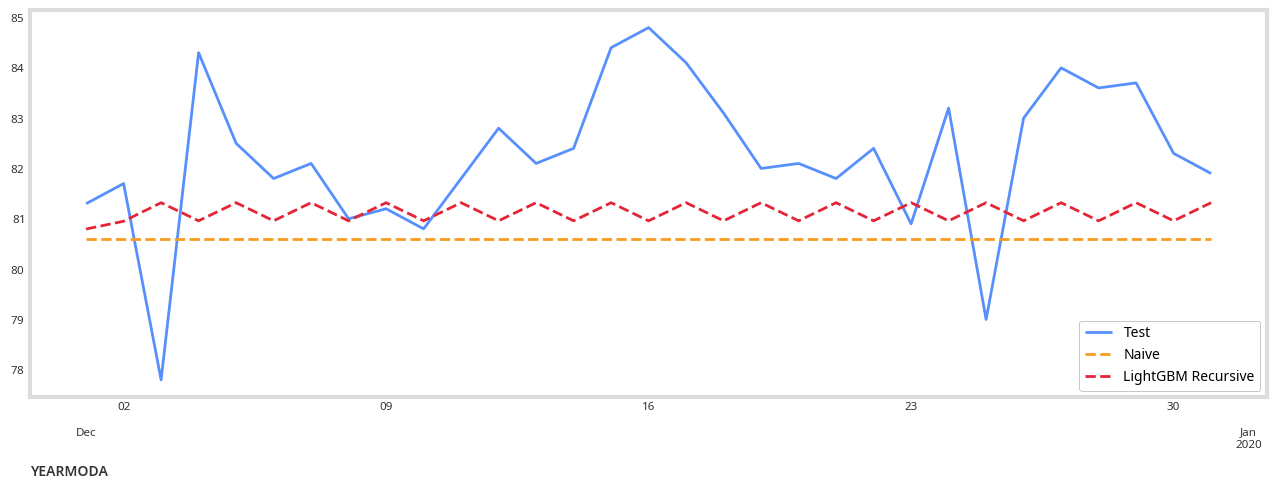

In [27]:
forecast_naive = naivef(ts_train, h=test_size)

print('     Naive MAE: %.4f Celsius' % mae(ts_test, forecast_naive))
print('  LightGBM MAE: %.4f Celsius' % mae(ts_test, forecast_recursive))

ax = ts_test.plot(figsize=(15,5), label='Test')
plt.plot(ts_test.index, forecast_naive, linestyle = '--', label='Naive')
plt.plot(ts_test.index, forecast_recursive, linestyle = '--', label='LightGBM Recursive')
ax.autoscale()
ax.legend()
plt.show()

<b>IMPORTANT NOTE:</b> We have to re-optimize the window size, since this is a new inference task.

#### Direct Forecasting

In direct forecasting, we train $n$ independent models and generate a multi-step forecast by concatenating the $n$ predictions.

For this implementation, we need to create a new $(X,Y)$ dataset, where $Y$ is now a vector of $n$ values.

In [17]:
w = 62
h = 31
test_size = 31
target = ['TEMP']
features = ['TEMP']

df_train, df_test = train_test_split(df_sample, w, h, test_size, features)

train_x, train_y = create_xy(df_train, target[0], w, h, shuffle=False)
test_x, test_y = create_xy(df_test, target[0], w, h, shuffle=False)

train_x = train_x.reshape((train_x.shape[0], train_x.shape[1]*train_x.shape[2]))
test_x = test_x.reshape((test_x.shape[0], test_x.shape[1]*test_x.shape[2]))

In [18]:
from sklearn.multioutput import MultiOutputRegressor

model = MultiOutputRegressor(lgb.LGBMRegressor(), n_jobs = -1)

model.fit(train_x, train_y)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.074593 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3826
[LightGBM] [Info] Number of data points in the train set: 242, number of used features: 62
[LightGBM] [Info] Start training from score 84.508678
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.047828 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3826
[LightGBM] [Info] Number of data points in the train set: 242, number of used features: 62
[LightGBM] [Info] Start training from score 84.504132
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.109908 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3826
[LightGBM] [Info] Number of data points in the train set: 242, number of used features: 62
[LightGBM] [Info] Auto-choosing

,estimator,LGBMRegressor()
,n_jobs,-1
,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.1
,n_estimators,100
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0


In [19]:
forecast_direct = model.predict(test_x).ravel()

/home/iragca/Documents/github/DS412-Time-Series-Analysis-and-Stochastic-Processes/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/iragca/Documents/github/DS412-Time-Series-Analysis-and-Stochastic-Processes/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/iragca/Documents/github/DS412-Time-Series-Analysis-and-Stochastic-Processes/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/iragca/Documents/github/DS412-Time-Series-Analysis-and-Stochastic-Processes/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, b

  LightGBM Recursive MAE: 1.5482 Celsius
     LightGBM Direct MAE: 1.2419 Celsius


/tmp/ipykernel_327880/1527415705.py:7: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  plt.plot(ts_test.index, forecast_recursive, linestyle = '--', label='LightGBM Recursive')


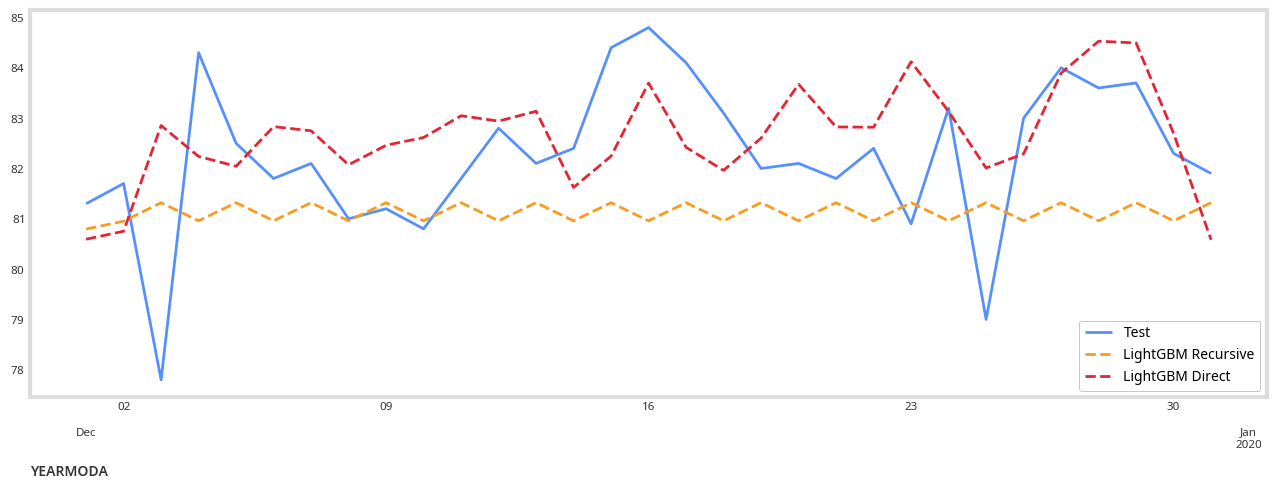

In [28]:
# print('               Naive MAE: %.4f Celsius' % mae(ts_test, forecast_naive))
print('  LightGBM Recursive MAE: %.4f Celsius' % mae(ts_test, forecast_recursive))
print('     LightGBM Direct MAE: %.4f Celsius' % mae(ts_test, forecast_direct))

ax = ts_test.plot(figsize=(15,5), label='Test')
# plt.plot(ts_test.index, forecast_naive, linestyle = '--', label='Naive')
plt.plot(ts_test.index, forecast_recursive, linestyle = '--', label='LightGBM Recursive')
plt.plot(ts_test.index, forecast_direct, linestyle = '--', label='LightGBM Direct')
ax.autoscale()
ax.legend()
plt.show()

<b>IMPORTANT NOTE:</b> Again, we have to re-optimize the window size, since this is a new inference task!

#### Single-Shot Forecasting

In single-shot forecasting, we create a model that attempts to predict all $n$-steps simultaneously.

Note that `LightGBM` does not support multi-output. Neural network models do however!

In [21]:
w = 62
h = 31
test_size = 31
target = ['TEMP']
features = ['TEMP']

df_train, df_test = train_test_split(df_sample, w, h, test_size, features)

### NORMALIZE ###
train_mean = df_train.mean().to_numpy()
train_std = df_train.std().to_numpy()
df_train = (df_train - train_mean)/train_std
df_test = (df_test - train_mean)/train_std

train_x, train_y = create_xy(df_train, target[0], w, h, shuffle=False)
test_x, test_y = create_xy(df_test, target[0], w, h, shuffle=False)

train_x = train_x.reshape((train_x.shape[0], train_x.shape[1]*train_x.shape[2]))
test_x = test_x.reshape((test_x.shape[0], test_x.shape[1]*test_x.shape[2]))

In [22]:
import tensorflow as tf

tf.keras.backend.clear_session()
tf.random.set_seed(1)

model = tf.keras.models.Sequential([                                                    
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(test_size)
])

model.compile(
    loss='mean_absolute_error',
    optimizer=tf.keras.optimizers.Adam())

history = model.fit(
    train_x, train_y, 
    epochs=5, 
    batch_size=1,
    verbose=1,
    validation_split=0.2)

Epoch 1/5
193/193 [==============================] - 2s 5ms/step - loss: 0.9554 - val_loss: 0.6998
Epoch 2/5
193/193 [==============================] - 0s 2ms/step - loss: 0.6965 - val_loss: 0.7174
Epoch 3/5
193/193 [==============================] - 0s 3ms/step - loss: 0.6492 - val_loss: 0.7363
Epoch 4/5
193/193 [==============================] - 0s 2ms/step - loss: 0.5851 - val_loss: 0.7450
Epoch 5/5
193/193 [==============================] - 0s 2ms/step - loss: 0.5679 - val_loss: 0.7656


In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (1, 32)                   2016      
_________________________________________________________________
dense_1 (Dense)              (1, 31)                   1023      
Total params: 3,039
Trainable params: 3,039
Non-trainable params: 0
_________________________________________________________________


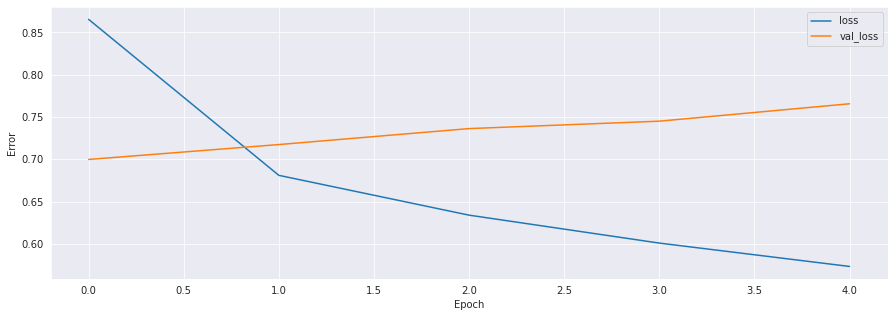

In [24]:
fig, ax = plt.subplots(figsize=(15,5))  
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.show()

In [25]:
forecast_nn = model.predict(test_x).ravel()*train_std + train_mean # Reverse transform

In [26]:
ts_train

YEARMODA
2019-01-01    78.2
2019-01-02    81.4
2019-01-03    80.6
2019-01-04    82.2
2019-01-05    81.1
              ... 
2019-11-26    82.0
2019-11-27    83.9
2019-11-28    84.0
2019-11-29    81.2
2019-11-30    80.6
Name: TEMP, Length: 334, dtype: float64

               Naive MAE: 1.9387 Celsius
  LightGBM Recursive MAE: 1.5482 Celsius
     LightGBM Direct MAE: 1.2419 Celsius
     MLP Single-Shot MAE: 1.3690 Celsius


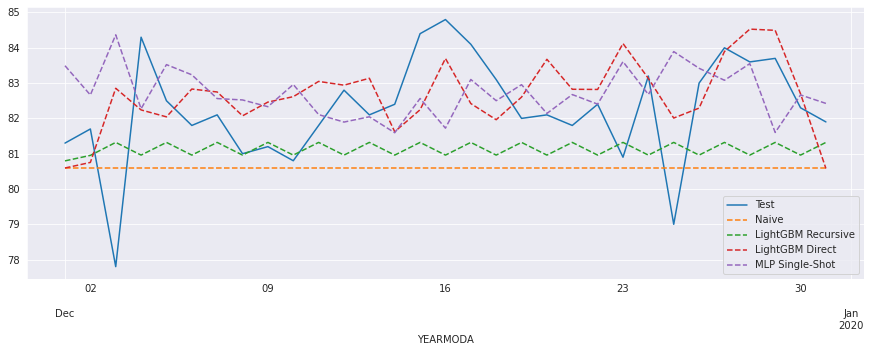

In [27]:
print('               Naive MAE: %.4f Celsius' % mae(ts_test, forecast_naive))
print('  LightGBM Recursive MAE: %.4f Celsius' % mae(ts_test, forecast_recursive))
print('     LightGBM Direct MAE: %.4f Celsius' % mae(ts_test, forecast_direct))
print('     MLP Single-Shot MAE: %.4f Celsius' % mae(ts_test, forecast_nn))

ax = ts_test.plot(figsize=(15,5), label='Test')
plt.plot(ts_test.index, forecast_naive, linestyle = '--', label='Naive')
plt.plot(ts_test.index, forecast_recursive, linestyle = '--', label='LightGBM Recursive')
plt.plot(ts_test.index, forecast_direct, linestyle = '--', label='LightGBM Direct')
plt.plot(ts_test.index, forecast_nn, linestyle = '--', label='MLP Single-Shot')
ax.autoscale()
ax.legend()
plt.show()

### Forecasting with Exogenous Variables

One of the benefits of taking a regression approach to time series forecasting is that it is relatively straight forward to add more predictors to the model.

Let's see if we can improve the forecast accuracy of the LightGBM with direct forecasting by adding exogenous variables.

In [62]:
w = 62
h = 31
test_size = 31
target = ['TEMP']
features = ['TEMP', 'MIN']
#features = ['TEMP', 'MAX', 'MIN', 'WDSP', 'MXSPD', 'PRCP']

df_train, df_test = train_test_split(df_sample, w, h, test_size, features)

train_x, train_y = create_xy(df_train, target[0], w, h, shuffle=False)
test_x, test_y = create_xy(df_test, target[0], w, h, shuffle=False)

train_x = train_x.reshape((train_x.shape[0], train_x.shape[1]*train_x.shape[2]))
test_x = test_x.reshape((test_x.shape[0], test_x.shape[1]*test_x.shape[2]))

print('     Train X Shape:', train_x.shape)
print('     Train Y Shape:', train_y.shape)

print('      Test X Shape:', test_x.shape)
print('      Test Y Shape:', test_y.shape)

     Train X Shape: (242, 124)
     Train Y Shape: (242, 31)
      Test X Shape: (1, 124)
      Test Y Shape: (1, 31)


In [63]:
model = MultiOutputRegressor(lgb.LGBMRegressor(), n_jobs = -1)

model.fit(train_x, train_y)

MultiOutputRegressor(estimator=LGBMRegressor(), n_jobs=-1)

In [64]:
forecast_direct_m = model.predict(test_x).ravel()

     LightGBM Direct Uni MAE: 1.2419 Celsius
     LightGBM Direct Mul MAE: 1.2007 Celsius


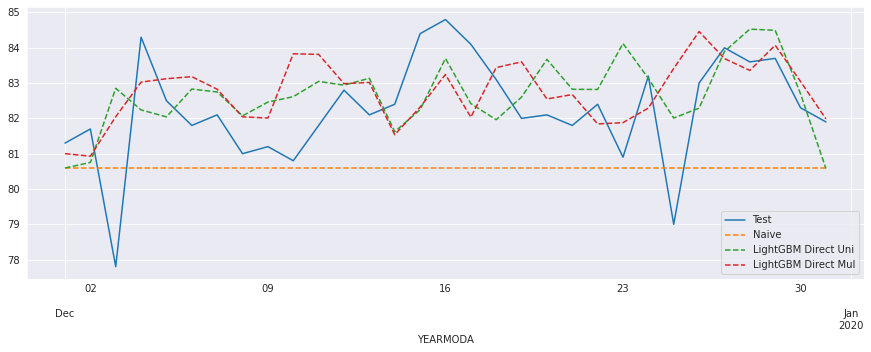

In [65]:
print('     LightGBM Direct Uni MAE: %.4f Celsius' % mae(ts_test, forecast_direct))
print('     LightGBM Direct Mul MAE: %.4f Celsius' % mae(ts_test, forecast_direct_m))

ax = ts_test.plot(figsize=(15,5), label='Test')
plt.plot(ts_test.index, forecast_naive, linestyle = '--', label='Naive')
plt.plot(ts_test.index, forecast_direct, linestyle = '--', label='LightGBM Direct Uni')
plt.plot(ts_test.index, forecast_direct_m, linestyle = '--', label='LightGBM Direct Mul')
ax.autoscale()
ax.legend()
plt.show()